<h2>EDA - Análisis gráfico de los datos sobre taxis en Nueva York</h2>

En esta hoja del EDA incluimos el análisis gráfico y descriptivo de los datos recopilados por los taxis en Nueva York.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:
# Ignorar todos los warnings de pandas
warnings.filterwarnings('ignore')

In [3]:
df_taxis = pd.read_parquet(r'Datasets/limpios/taxis.parquet')

<p style="font-size:18px;"><u>Viajes por tipo de vehículo </u> </p>

In [4]:
trips_count_by_type = df_taxis.groupby('taxi_type').size().reset_index(name='trip_count')

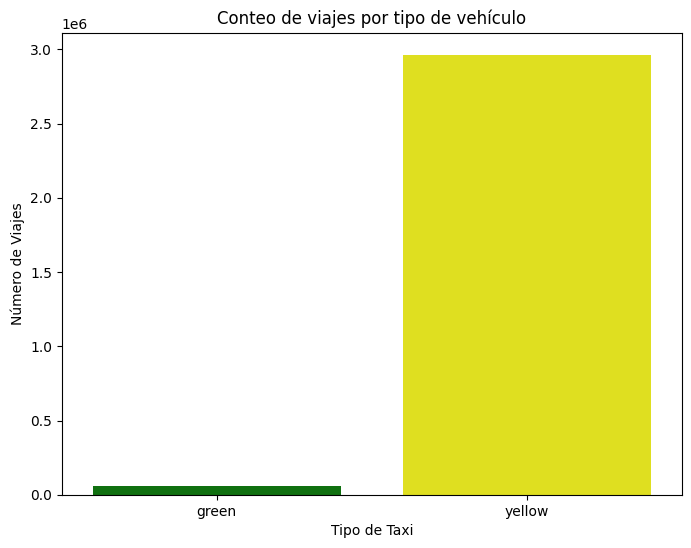

In [5]:
plt.figure(figsize=(8, 6))
sns.barplot(x='taxi_type', y='trip_count', data=trips_count_by_type, palette=['green', 'yellow'])
plt.xlabel('Tipo de Taxi')
plt.ylabel('Número de Viajes')
plt.title('Conteo de viajes por tipo de vehículo')
plt.show()

<p style="font-size:18px;"><u>Cantidad de pasajeros por viaje </u> </p>

In [6]:
passenger_count = df_taxis.groupby('passenger_count').size().reset_index(name='trip_count')

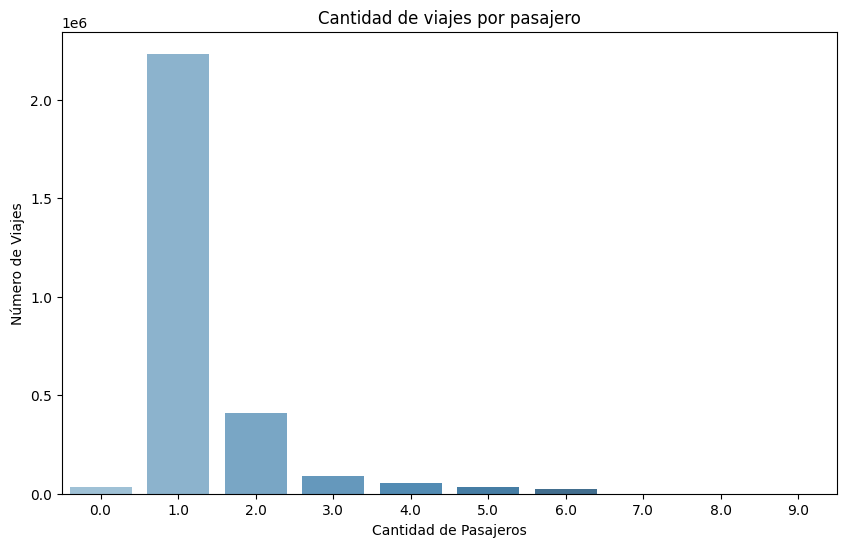

In [7]:

plt.figure(figsize=(10, 6))
sns.barplot(x='passenger_count', y='trip_count', data=passenger_count, palette='Blues_d')
plt.xlabel('Cantidad de Pasajeros')
plt.ylabel('Número de Viajes')
plt.title('Cantidad de viajes por pasajero')
plt.xticks(passenger_count['passenger_count'])  
plt.show()

<p style="font-size:15px;">En este gráfico podemos observar que el pasajero que se moviliza solo es el que más cantidad de viajes hace. Luego le siguen dos pasajeros por vehículo. Este es un dato relevante, porque nos dice que los ciudadanos cuentan con el poder adquisitivo necesario para pagar un taxi de forma individual, algo que no sucede en todos los paises.</p>

<p style="font-size:18px;"><u>Viajes por tipo de pago y tipo de tarifa </u> </p>

In [8]:
payment_ratecode_count = df_taxis.groupby(['payment_type', 'RatecodeID']).size().reset_index(name='trip_count')

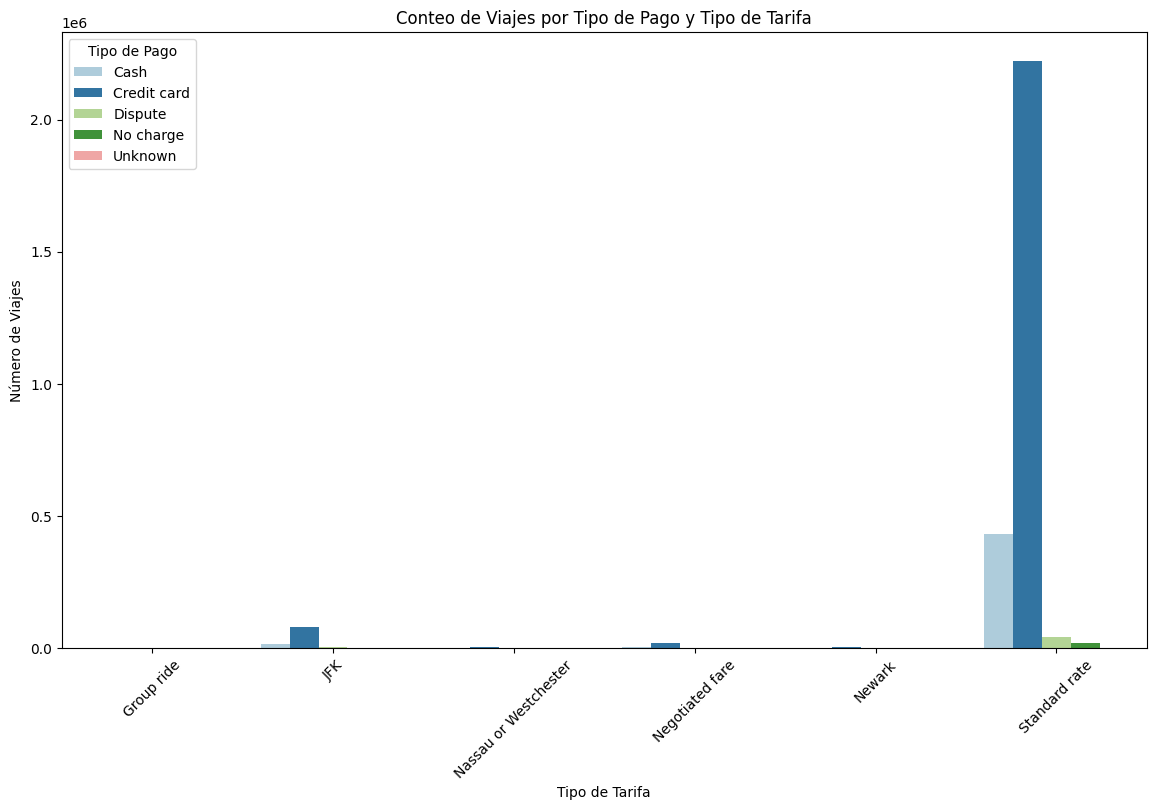

In [9]:
plt.figure(figsize=(14, 8))
sns.barplot(x='RatecodeID', y='trip_count', hue='payment_type', data=payment_ratecode_count, palette='Paired')
plt.xlabel('Tipo de Tarifa')
plt.ylabel('Número de Viajes')
plt.title('Conteo de Viajes por Tipo de Pago y Tipo de Tarifa')
plt.xticks(rotation=45)
plt.legend(title='Tipo de Pago')
plt.show()

<p style="font-size:15px;">En este gráfico podemos observar que hay la tarjeta de crédito es el medio de pago que más se utiliza en Nueva York, seguido del efectivo pero con una gran diferencia. Esto es muy común ya que en las grandes ciudades de los países desarrollados la tarjeta de crédito es el medio de pago por excelencia en muchos servicios. Por otro lado, podemos observar que la tarifa que màs predomina es la tarifa estándar.</p>

<p style="font-size:18px;"><u>Histórico de cantidad de viajes del mes de enero 2024 </u> </p>

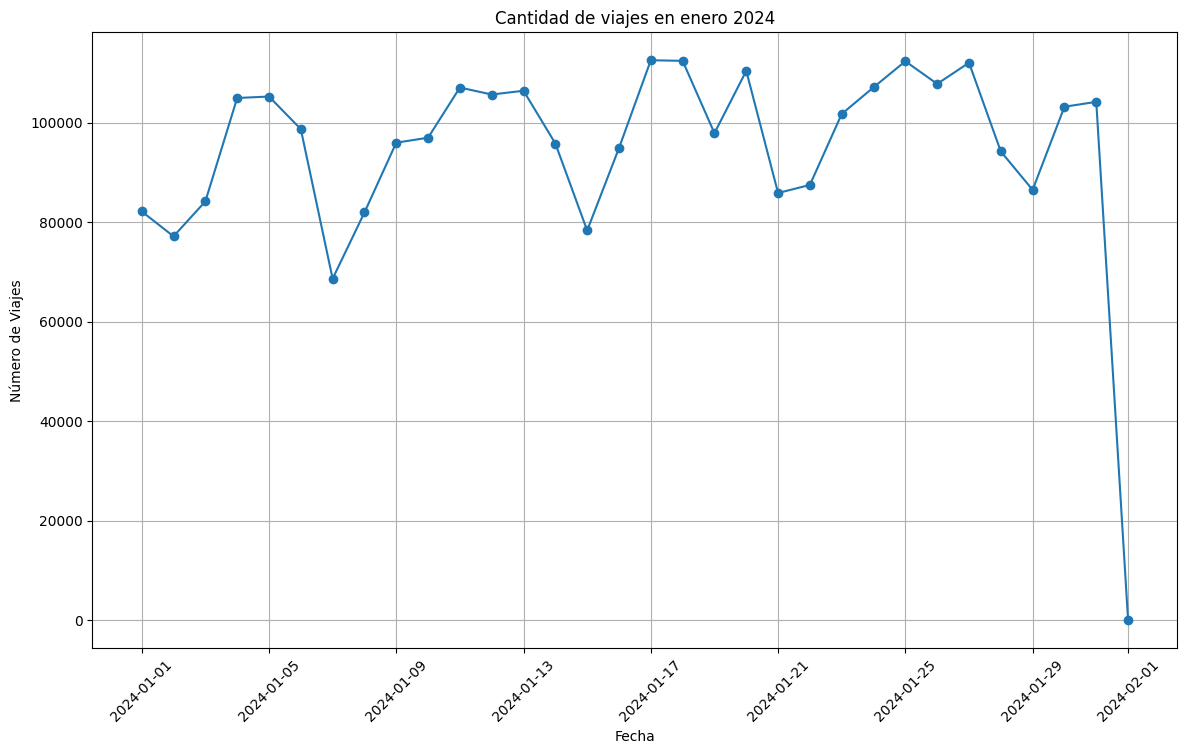

In [10]:
df_taxis['pickup_datetime'] = pd.to_datetime(df_taxis['pickup_datetime'])

trips_per_day = df_taxis.groupby(df_taxis['pickup_datetime'].dt.date).size().reset_index(name='trip_count')

plt.figure(figsize=(14, 8))
plt.plot(trips_per_day['pickup_datetime'], trips_per_day['trip_count'], marker='o')
plt.xlabel('Fecha')
plt.ylabel('Número de Viajes')
plt.title('Cantidad de viajes en enero 2024')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

<p style="font-size:15px;">En este gráfico podemos observar que en el mes de enero de 2024, se realizaron entre 80.000 y 130.000 viajes promedio por día. El pico màs bajo de viajes estuvo en las fechas que van desde el 6 al 8 de enero</p>

<p style="font-size:18px;"><u>Cantidad de viajes por distrito</u> </p>

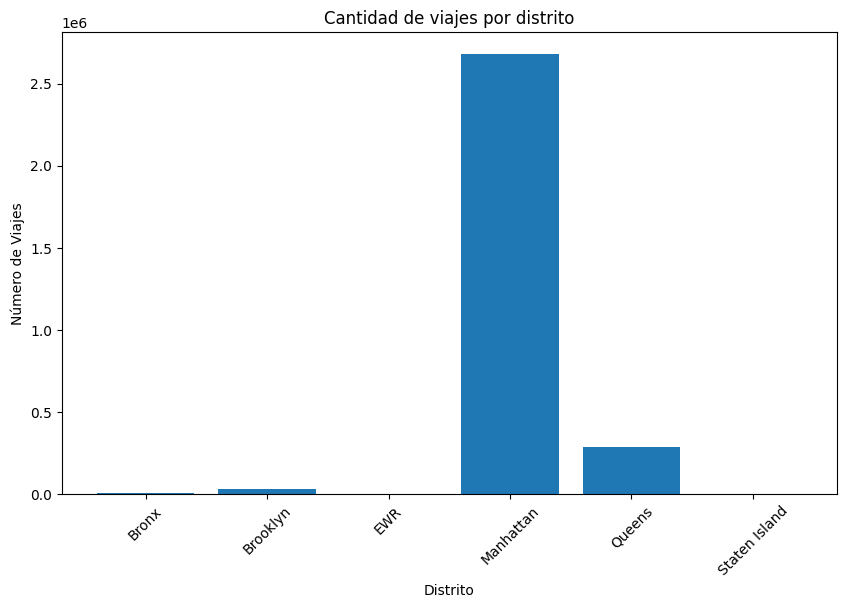

In [11]:
df_location = pd.read_parquet(r'Datasets/limpios/localizacion.parquet')

df_combined = pd.merge(df_taxis, df_location, left_on='PULocationID', right_on='LocationID', how='inner')

trips_per_borough = df_combined.groupby('Borough').size().reset_index(name='trip_count')

plt.figure(figsize=(10, 6))
plt.bar(trips_per_borough['Borough'], trips_per_borough['trip_count'])
plt.xlabel('Distrito')
plt.ylabel('Número de Viajes')
plt.title('Cantidad de viajes por distrito')
plt.xticks(rotation=45)
plt.show()

<p style="font-size:15px;">En este gráfico podemos observar Manhattan es el distrito con màs viajes hechos en taxi en Nueva York, seguido de Queens y luego Brooklyn. Sorprendentemente, si analizamos los datos, vemos que Manhattan no es el distrito con mayor cantidad de habitantes (1.593.200), sino que es Brooklyn con 2.511.408 habitantes. Sin embargo, al ser el núcleo financiero de Nueva York y al ser un centro turístico muy importante genera una enorme movilidad de los ciudadanos y los turistas a través de medios como los taxis</p>

<p style="font-size:18px;"><u>Cantidad de viajes por barrio de descenso de pasajeros</u> </p>

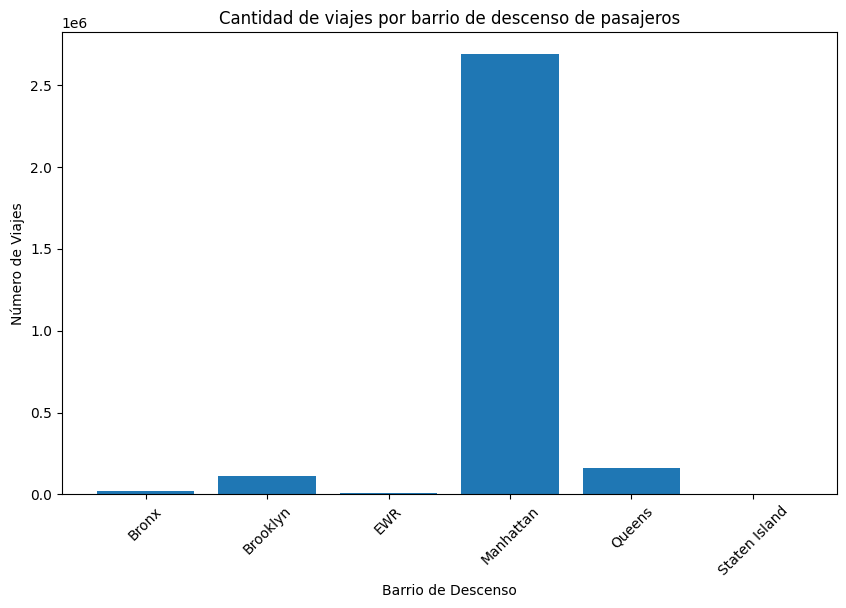

In [12]:
df_combined = pd.merge(df_taxis, df_location, left_on='DOLocationID', right_on='LocationID', how='inner')

trips_per_borough = df_combined.groupby('Borough').size().reset_index(name='trip_count')

plt.figure(figsize=(10, 6))
plt.bar(trips_per_borough['Borough'], trips_per_borough['trip_count'])
plt.xlabel('Barrio de Descenso')
plt.ylabel('Número de Viajes')
plt.title('Cantidad de viajes por barrio de descenso de pasajeros')
plt.xticks(rotation=45)
plt.show()

<p style="font-size:15px;">En este gráfico podemos observar Manhattan es el distrito con mayor cantidad de descenso de pasajeros. Tal como explicabamos antes, este distrito es el que más produce a nivel financiero y turístico, por lo tanto es un núcleo importante para carga y descarga de pasajeros.</p>

<p style="font-size:23px;">Análisis de viajes en taxis amarillos</p>

<p style="font-size:18px;"><u>Costo promedio por viaje taxis amarillos - Enero 2024</u> </p>

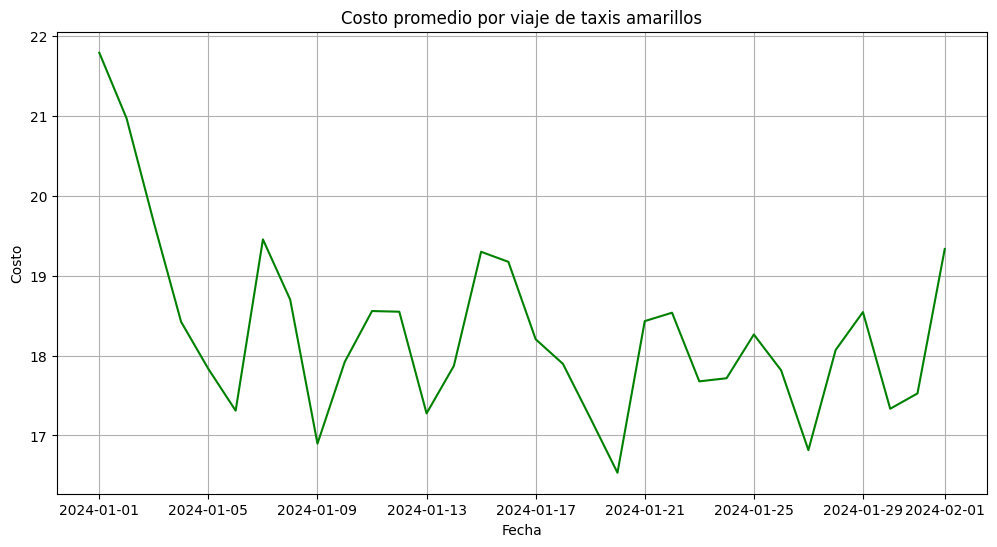

In [13]:

df_yellow_taxi = df_taxis[df_taxis['taxi_type'] == 'yellow'].copy()

df_yellow_taxi.loc[:, 'pickup_datetime'] = pd.to_datetime(df_yellow_taxi['pickup_datetime'])

promedio_costo_fecha = df_yellow_taxi.groupby(df_yellow_taxi['pickup_datetime'].dt.date)['fare_amount'].mean()

plt.figure(figsize=(12, 6))
promedio_costo_fecha.plot(kind='line', color='green')
plt.xlabel('Fecha')
plt.ylabel('Costo')
plt.title('Costo promedio por viaje de taxis amarillos')
plt.grid(True)
plt.show()

<p style="font-size:15px;">En este gráfico podemos observar que que el costo promedio de un viaje ronda entre, máximo 22 y mínimo 15 aproximadamente.</p>

<p style="font-size:18px;"><u>Distancia recorrida por taxis amarillos</u> </p>

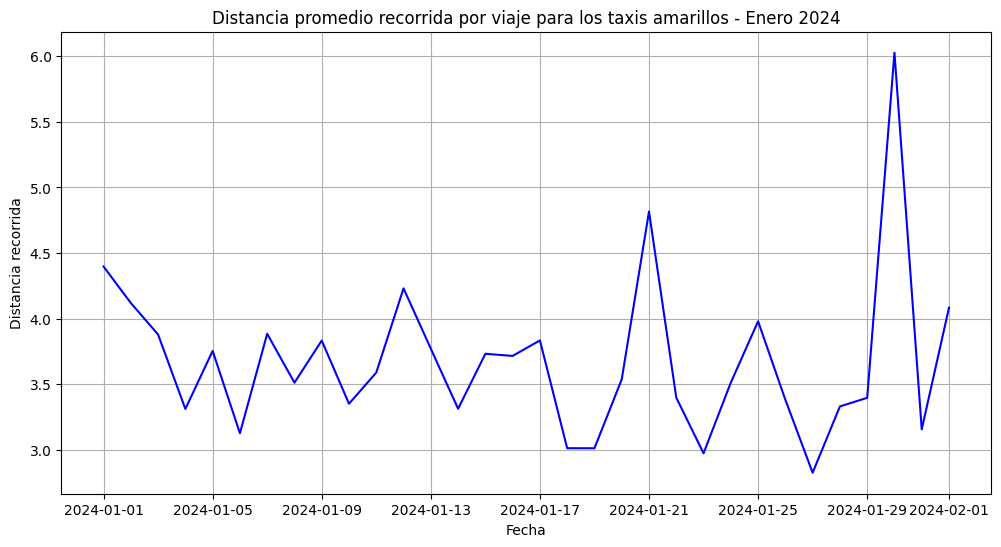

In [14]:
df_yellow_taxi = df_taxis[df_taxis['taxi_type'] == 'yellow'].copy()

df_yellow_taxi.loc[:, 'pickup_datetime'] = pd.to_datetime(df_yellow_taxi['pickup_datetime'])

promedio_distancia_fecha = df_yellow_taxi.groupby(df_yellow_taxi['pickup_datetime'].dt.date)['trip_distance'].mean()

plt.figure(figsize=(12, 6))
promedio_distancia_fecha.plot(kind='line', color='blue')
plt.xlabel('Fecha')
plt.ylabel('Distancia recorrida')
plt.title('Distancia promedio recorrida por viaje para los taxis amarillos - Enero 2024')
plt.grid(True)
plt.show()

<p style="font-size:15px;">En este gráfico podemos observar que la distancia promedio de un viaje, en los taxis amarillos ronda entre 5 y 3 km.</p>

<p style="font-size:18px;"><u>Promedio de duración por viaje de taxis amarillos - Enero 2024</u> </p>

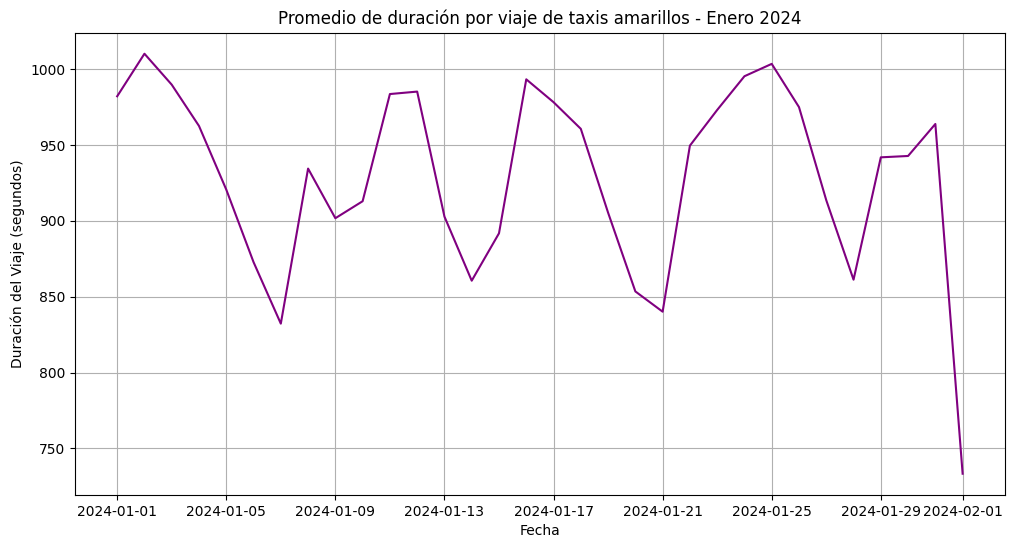

In [15]:

df_yellow_taxi = df_taxis[df_taxis['taxi_type'] == 'yellow'].copy()

df_yellow_taxi.loc[:, 'pickup_datetime'] = pd.to_datetime(df_yellow_taxi['pickup_datetime'])
df_yellow_taxi.loc[:, 'dropoff_datetime'] = pd.to_datetime(df_yellow_taxi['dropoff_datetime'])

df_yellow_taxi.loc[:, 'duracion_viaje'] = (df_yellow_taxi['dropoff_datetime'] - df_yellow_taxi['pickup_datetime']).dt.total_seconds()

promedio_duracion_fecha = df_yellow_taxi.groupby(df_yellow_taxi['pickup_datetime'].dt.date)['duracion_viaje'].mean()

plt.figure(figsize=(12, 6))
promedio_duracion_fecha.plot(kind='line', color='purple')
plt.xlabel('Fecha')
plt.ylabel('Duración del Viaje (segundos)')
plt.title('Promedio de duración por viaje de taxis amarillos - Enero 2024')
plt.grid(True)
plt.show()


<p style="font-size:15px;">En este gráfico podemos observar que la duración de los viajes en taxis amarillos en Enero de 2024 tiene una gran amplitud. El viaje con menos duración ronda los 13.7 minutos, mientras que el viaje con mayor duración es de aproximadamente 15 minutos.</p>

<p style="font-size:18px;"><u>Promedio de costo en relación a la cantidad de pasajeros</u> </p>

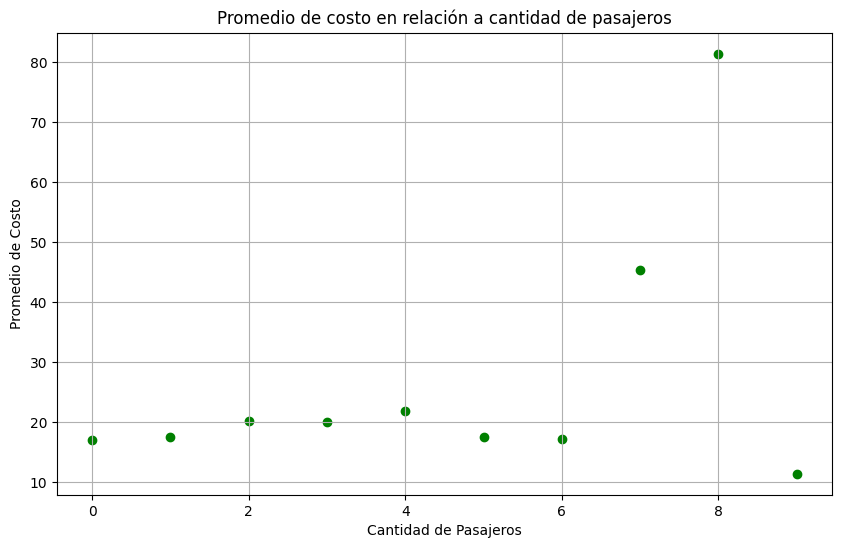

In [16]:

df_yellow_taxi = df_taxis[df_taxis['taxi_type'] == 'yellow']

promedio_costo_pasajeros = df_yellow_taxi.groupby('passenger_count')['fare_amount'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.scatter(promedio_costo_pasajeros['passenger_count'], promedio_costo_pasajeros['fare_amount'], color='green')
plt.xlabel('Cantidad de Pasajeros')
plt.ylabel('Promedio de Costo')
plt.title('Promedio de costo en relación a cantidad de pasajeros')
plt.grid(True)
plt.show()

<p style="font-size:15px;">En este gráfico podemos observar que el costo de la tarifa del taxi se eleva muy por encima de la media cuando los pasajeros se encuentran entre 7 y 8, siendo 8 el más preponderante.</p>

<p style="font-size:18px;"><u>Promedio de costo en relación los distritos de abordaje</u> </p>

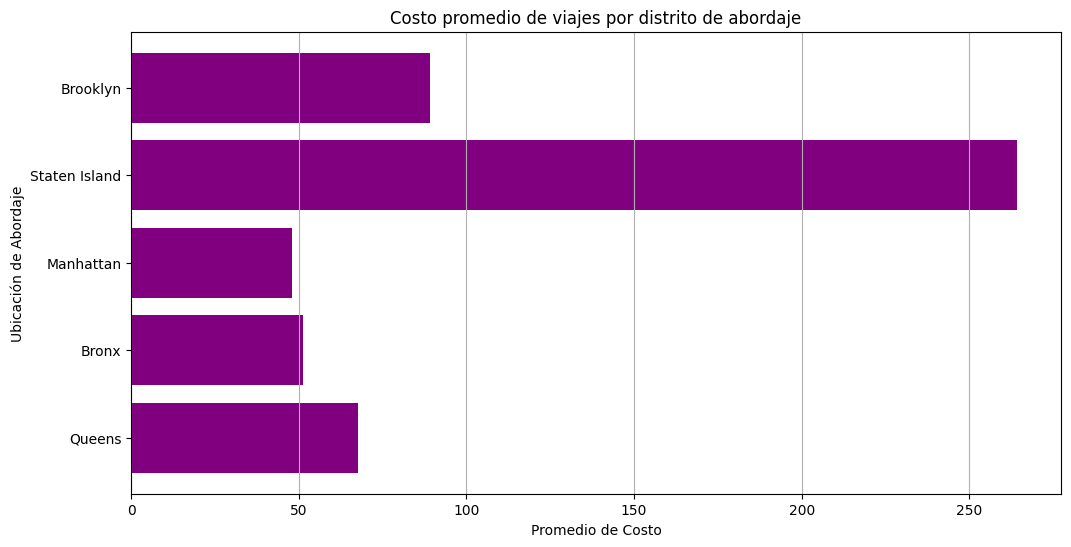

In [17]:
df_yellow_taxi = df_taxis[df_taxis['taxi_type'] == 'yellow']

promedio_costo_localizacion = df_yellow_taxi.groupby('PULocationID')['fare_amount'].mean().reset_index()

df_ubicaciones = pd.read_parquet('Datasets/limpios/localizacion.parquet')
df_ubicaciones.rename(columns={'LocationID': 'PULocationID'}, inplace=True)

df_ubicaciones = df_ubicaciones[df_ubicaciones['Borough'] != 'EWR']

promedio_costo_localizacion = pd.merge(promedio_costo_localizacion, df_ubicaciones, on='PULocationID')

plt.figure(figsize=(12, 6))
plt.barh(promedio_costo_localizacion['Borough'], promedio_costo_localizacion['fare_amount'], color='purple')
plt.xlabel('Promedio de Costo')
plt.ylabel('Ubicación de Abordaje')
plt.title('Costo promedio de viajes por distrito de abordaje')
plt.grid(axis='x')
plt.show()

<p style="font-size:15px;">En este gráfico podemos observar que el distrito de abordaje que tiene la tarifa más elevada para viajar en taxis es el de Staten Island, seguido de Brooklyn.</p>

<p style="font-size:18px;"><u>Promedio de costo en relación a la ubicación de destino</u> </p>

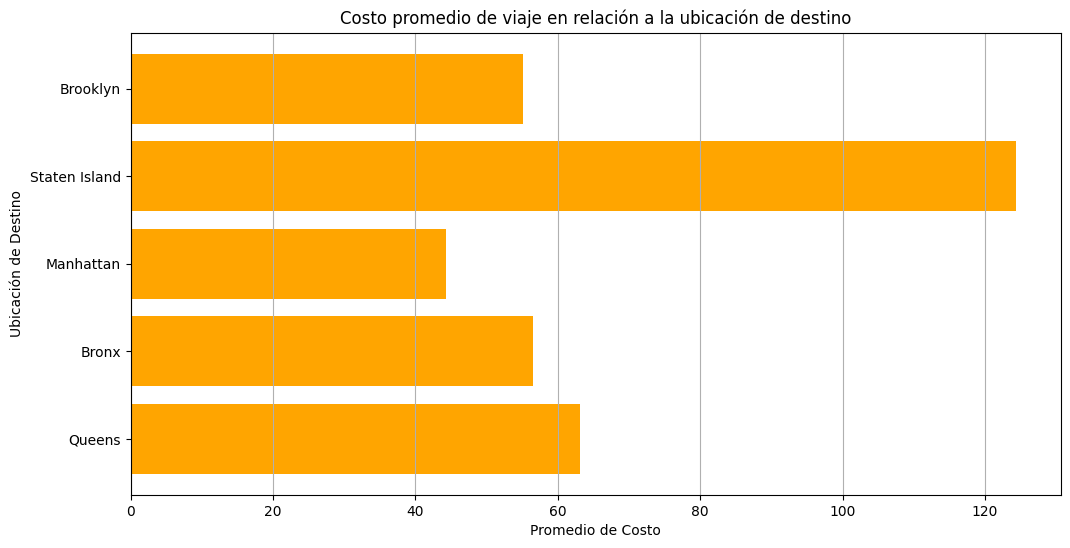

In [18]:
df_yellow_taxi = df_taxis[df_taxis['taxi_type'] == 'yellow']

promedio_costo_destino = df_yellow_taxi.groupby('DOLocationID')['fare_amount'].mean().reset_index()

df_destinos = pd.read_parquet('Datasets/limpios/localizacion.parquet')
df_destinos.rename(columns={'LocationID': 'DOLocationID'}, inplace=True)

df_destinos = df_destinos[df_destinos['Borough'] != 'EWR']

promedio_costo_destino = pd.merge(promedio_costo_destino, df_destinos, on='DOLocationID')

plt.figure(figsize=(12, 6))
plt.barh(promedio_costo_destino['Borough'], promedio_costo_destino['fare_amount'], color='orange')
plt.xlabel('Promedio de Costo')
plt.ylabel('Ubicación de Destino')
plt.title('Costo promedio de viaje en relación a la ubicación de destino')
plt.grid(axis='x')
plt.show()

<p style="font-size:15px;">En este gráfico podemos observar que el distrito que es màs caro para viajar como destino es Staten Island, seguido de Queens y Brooklyn.</p>

<p style="font-size:23px;">Análisis de viajes en taxis verdes</p>

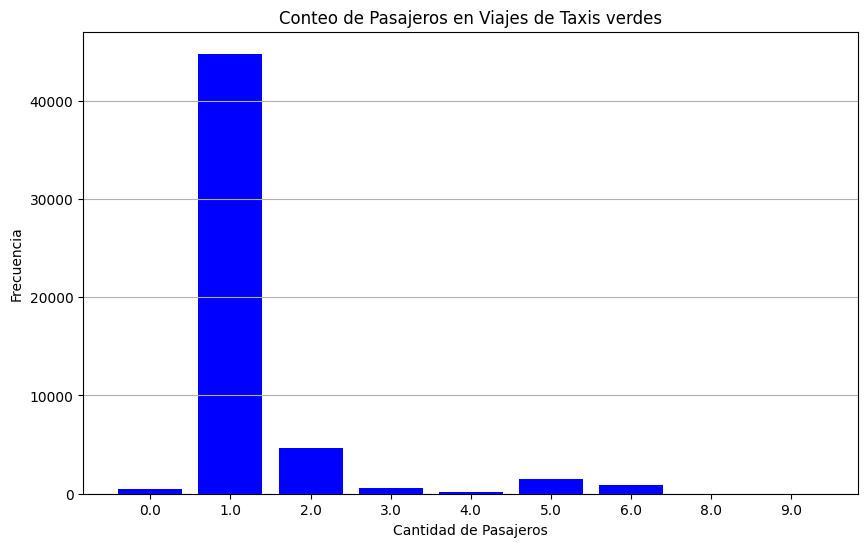

In [19]:
# Filtrar los datos para incluir solo los viajes de taxis verdes
df_green_taxi = df_taxis[df_taxis['taxi_type'] == 'green']

# Conteo de pasajeros
conteo_pasajeros = df_green_taxi['passenger_count'].value_counts().sort_index()

# Graficar el conteo de pasajeros
plt.figure(figsize=(10, 6))
plt.bar(conteo_pasajeros.index.astype(str), conteo_pasajeros.values, color='blue')
plt.xlabel('Cantidad de Pasajeros')
plt.ylabel('Frecuencia')
plt.title('Conteo de Pasajeros en Viajes de Taxis verdes')
plt.grid(axis='y')
plt.show()

<p style="font-size:15px;">En este gráfico podemos observar que lo más común para los viajes, es que solo se suba un pasajero.</p>

<p style="font-size:18px;"><u>Histórico de cantidad de viajes de taxis verdes - Enero 2024</u> </p>

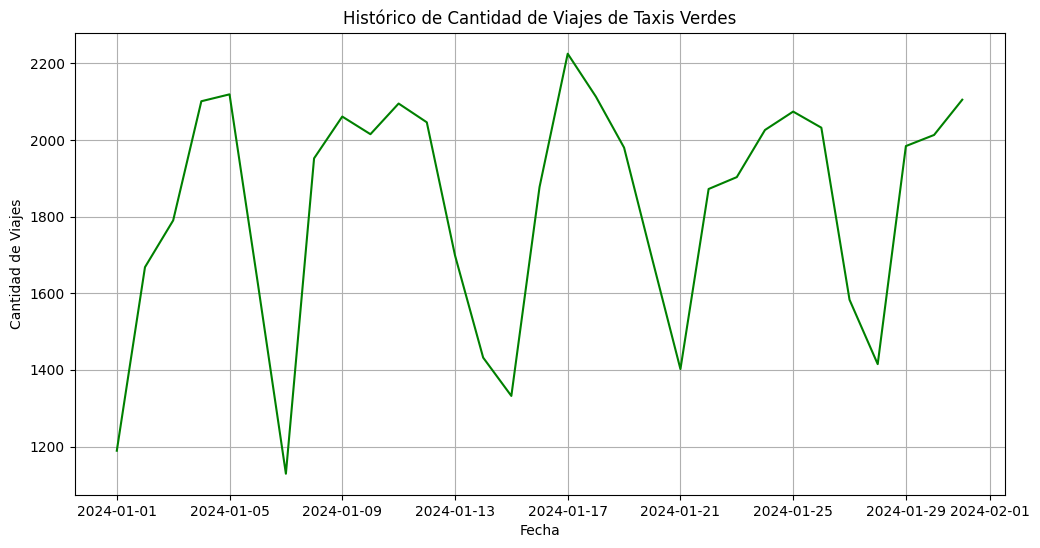

In [20]:
df_green_taxi = df_taxis[df_taxis['taxi_type'] == 'green'].copy()

df_green_taxi.loc[:, 'pickup_datetime'] = pd.to_datetime(df_green_taxi['pickup_datetime'])

historico_viajes = df_green_taxi.groupby(df_green_taxi['pickup_datetime'].dt.date).size()

plt.figure(figsize=(12, 6))
historico_viajes.plot(kind='line', color='green')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Viajes')
plt.title('Histórico de Cantidad de Viajes de Taxis Verdes')
plt.grid(True)
plt.show()

<p style="font-size:15px;">En este gráfico podemos observar que en lo que fue Enero de 2024, los taxis verdes tuvieron una gran amplitud en lo que respecta al número de viajes, ubicandose la menor cantidad de viajes en torno a los 1000 en un día y llegando a un pico máximo de 2220 viajes en otro día. Es decir, en un día se realizaron el doble de viajes de lo que fue el peor día.</p>

<p style="font-size:18px;"><u>Costo promedio de viajes - Enero 2024</u> </p>

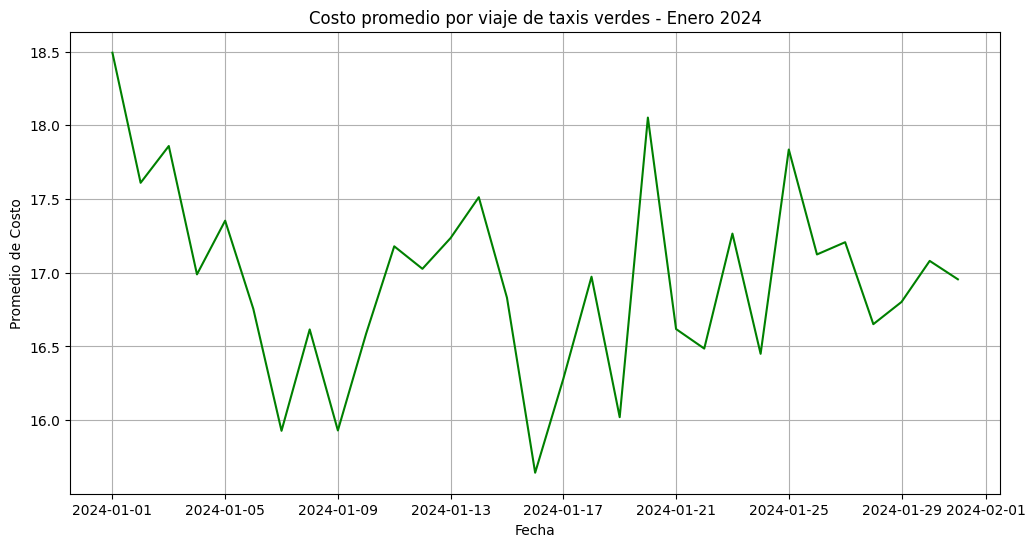

In [21]:
df_green_taxi = df_taxis[df_taxis['taxi_type'] == 'green'].copy()

df_green_taxi.loc[:, 'pickup_datetime'] = pd.to_datetime(df_green_taxi['pickup_datetime'])

promedio_costo_fecha = df_green_taxi.groupby(df_green_taxi['pickup_datetime'].dt.date)['fare_amount'].mean()

plt.figure(figsize=(12, 6))
promedio_costo_fecha.plot(kind='line', color='green')
plt.xlabel('Fecha')
plt.ylabel('Promedio de Costo')
plt.title('Costo promedio por viaje de taxis verdes - Enero 2024')
plt.grid(True)
plt.show()

<p style="font-size:15px;">En este gráfico podemos observar que el costo de los viajes en Enero 2024 tuvo una gran amplitud. El costo más elevado estuvo en el primer día del año, lo cual puede resultar lógico, ya que es una fecha donde viajan muchos turístas a pasar el año nuevo en Nueva York y eso puede hacer que el costo aumente. Por otro lado, el costo más bajo se situó cerca del 15 de enero.</p>

<p style="font-size:18px;"><u>Promedio de distancia recorrida por taxis verdes - Enero 2024</u> </p>

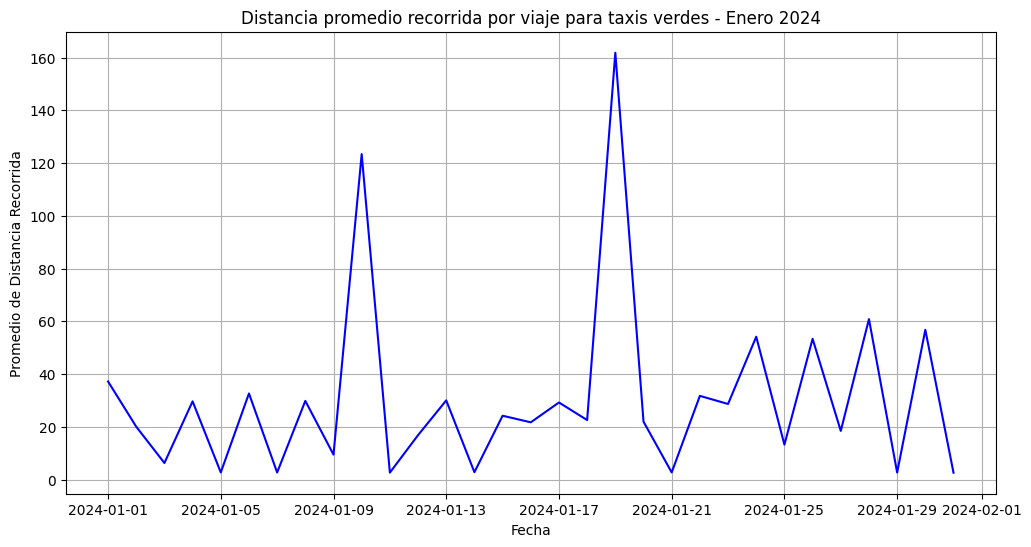

In [22]:
df_green_taxi = df_taxis[df_taxis['taxi_type'] == 'green'].copy()

df_green_taxi.loc[:, 'pickup_datetime'] = pd.to_datetime(df_green_taxi['pickup_datetime'])

promedio_distancia_fecha = df_green_taxi.groupby(df_green_taxi['pickup_datetime'].dt.date)['trip_distance'].mean()

plt.figure(figsize=(12, 6))
promedio_distancia_fecha.plot(kind='line', color='blue')
plt.xlabel('Fecha')
plt.ylabel('Promedio de Distancia Recorrida')
plt.title('Distancia promedio recorrida por viaje para taxis verdes - Enero 2024')
plt.grid(True)
plt.show()

<p style="font-size:15px;">En este gráfico podemos observar que la distancia promedio de un viaje, en los taxis verdes ronda entre 60 y 5 km.</p>

<p style="font-size:18px;"><u>Duración promedio por viaje - Enero 2024</u> </p>

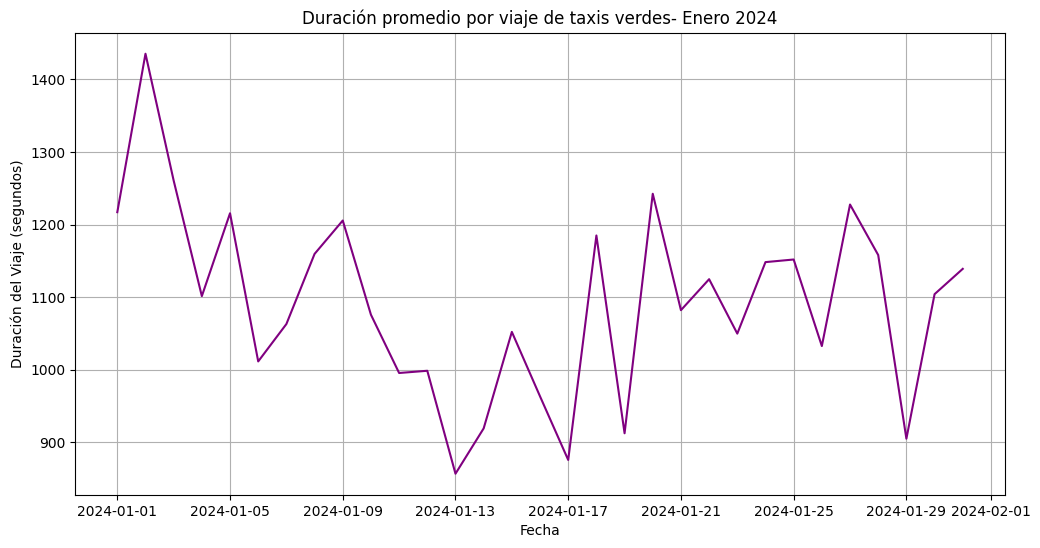

In [23]:

df_green_taxi = df_taxis[df_taxis['taxi_type'] == 'green'].copy()

df_green_taxi.loc[:, 'pickup_datetime'] = pd.to_datetime(df_green_taxi['pickup_datetime'])
df_green_taxi.loc[:, 'dropoff_datetime'] = pd.to_datetime(df_green_taxi['dropoff_datetime'])

df_green_taxi.loc[:, 'duracion_viaje'] = (df_green_taxi['dropoff_datetime'] - df_green_taxi['pickup_datetime']).dt.total_seconds()

promedio_duracion_fecha = df_green_taxi.groupby(df_green_taxi['pickup_datetime'].dt.date)['duracion_viaje'].mean()

plt.figure(figsize=(12, 6))
promedio_duracion_fecha.plot(kind='line', color='purple')
plt.xlabel('Fecha')
plt.ylabel('Duración del Viaje (segundos)')
plt.title('Duración promedio por viaje de taxis verdes- Enero 2024')
plt.grid(True)
plt.show()

<p style="font-size:15px;">En este gráfico podemos observar que la duración de los viajes en taxis verdes en Enero de 2024 tiene una gran amplitud. El viaje con menos duración ronda los 13.7 minutos, mientras que el viaje con mayor duración es de aproximadamente 23.3 minutos.</p>

<p style="font-size:18px;"><u>Promedio de costo en relación a la cantidad de pasajeros</u> </p>

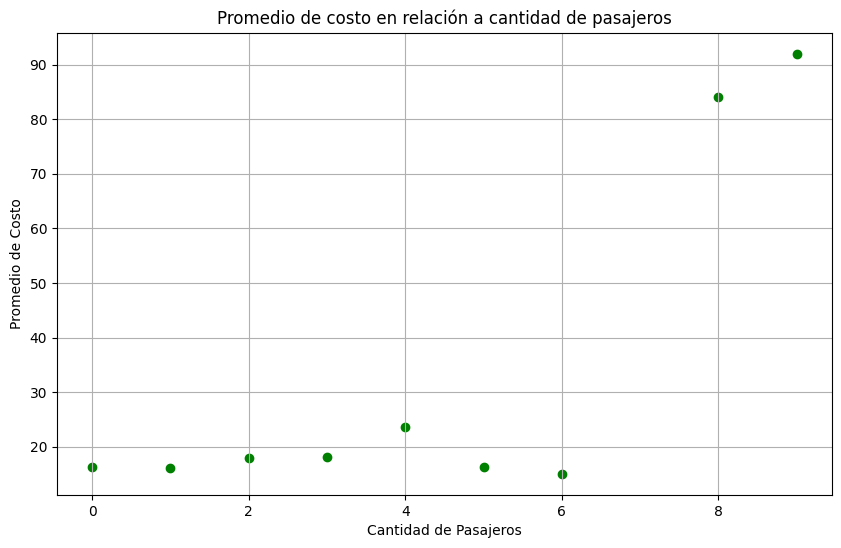

In [24]:
df_green_taxi = df_taxis[df_taxis['taxi_type'] == 'green']

promedio_costo_pasajeros = df_green_taxi.groupby('passenger_count')['fare_amount'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.scatter(promedio_costo_pasajeros['passenger_count'], promedio_costo_pasajeros['fare_amount'], color='green')
plt.xlabel('Cantidad de Pasajeros')
plt.ylabel('Promedio de Costo')
plt.title('Promedio de costo en relación a cantidad de pasajeros')
plt.grid(True)
plt.show()

<p style="font-size:15px;">En este gráfico podemos observar que el costo de la tarifa del taxi se eleva muy por encima de la media cuando los pasajeros se encuentran entre 7,8 y 9, siendo 9 el más preponderante.</p>

<p style="font-size:18px;"><u>Promedio de costo en relación los distritos de abordaje</u> </p>

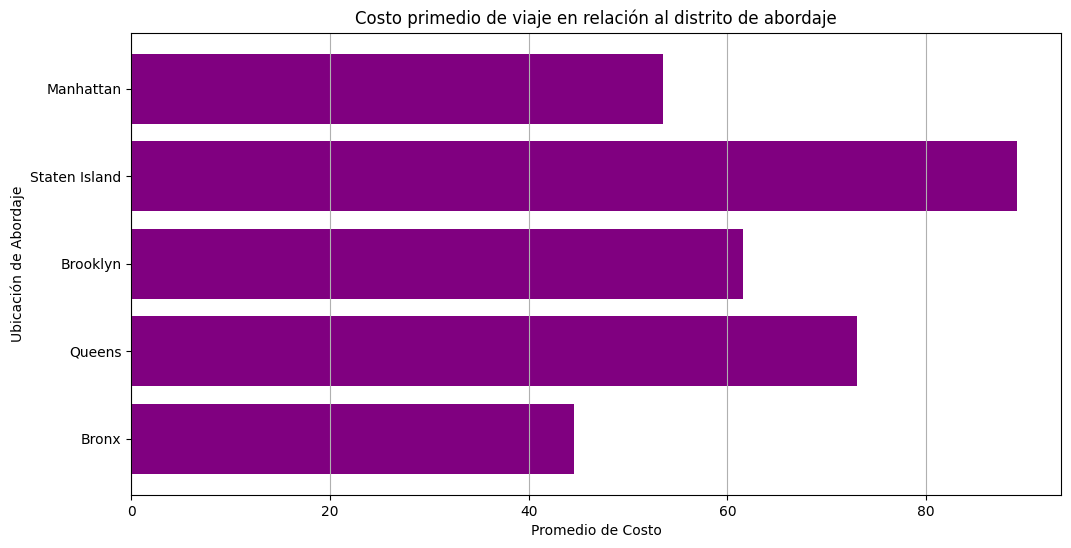

In [25]:

df_green_taxi = df_taxis[df_taxis['taxi_type'] == 'green']

promedio_costo_localizacion = df_green_taxi.groupby('PULocationID')['fare_amount'].mean().reset_index()

df_ubicaciones = pd.read_parquet('Datasets/limpios/localizacion.parquet')
df_ubicaciones.rename(columns={'LocationID': 'PULocationID'}, inplace=True)

df_ubicaciones = df_ubicaciones[df_ubicaciones['Borough'] != 'EWR']

promedio_costo_localizacion = pd.merge(promedio_costo_localizacion, df_ubicaciones, on='PULocationID')

plt.figure(figsize=(12, 6))
plt.barh(promedio_costo_localizacion['Borough'], promedio_costo_localizacion['fare_amount'], color='purple')
plt.xlabel('Promedio de Costo')
plt.ylabel('Ubicación de Abordaje')
plt.title('Costo primedio de viaje en relación al distrito de abordaje')
plt.grid(axis='x')
plt.show()

<p style="font-size:15px;">En este gráfico podemos observar que el distrito de abordaje que tiene la tarifa más elevada para viajar en taxis es el de Staten Island, seguido de Queens y luego de Brooklyn</p>

<p style="font-size:18px;"><u>Promedio de costo en relación a la ubicación de destino</u> </p>

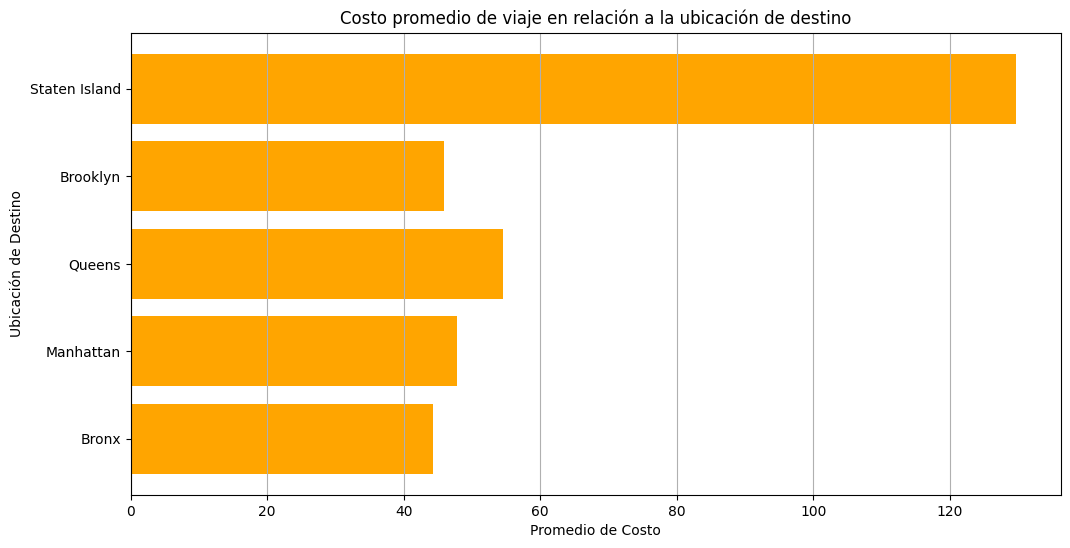

In [26]:

df_green_taxi = df_taxis[df_taxis['taxi_type'] == 'green']

promedio_costo_destino = df_green_taxi.groupby('DOLocationID')['fare_amount'].mean().reset_index()

df_destinos = pd.read_parquet('Datasets/limpios/localizacion.parquet')
df_destinos.rename(columns={'LocationID': 'DOLocationID'}, inplace=True)

df_destinos = df_destinos[df_destinos['Borough'] != 'EWR']

promedio_costo_destino = pd.merge(promedio_costo_destino, df_destinos, on='DOLocationID')

plt.figure(figsize=(12, 6))
plt.barh(promedio_costo_destino['Borough'], promedio_costo_destino['fare_amount'], color='orange')
plt.xlabel('Promedio de Costo')
plt.ylabel('Ubicación de Destino')
plt.title('Costo promedio de viaje en relación a la ubicación de destino')
plt.grid(axis='x')
plt.show()

<p style="font-size:15px;">En este gráfico podemos observar que el distrito de destino que tiene la tarifa más elevada para viajar en taxis es el de Staten Island, seguido de Queens y luego de Manhattan</p>

<p style="font-size:20px;"><u>Conclusiones</u></p>
<ul>
    <li><strong>Preferencia por Viajes Individuales:</strong> El análisis muestra que la mayoría de los viajes en taxis amarillos son realizados por un solo pasajero, seguido por dos pasajeros.</li>
    <br>
    <br>
    <li><strong>Dominio del Pago con Tarjeta de Crédito:</strong> En ambos tipos de taxis (amarillos y verdes), el pago con tarjeta de crédito es significativamente más utilizado que el efectivo.</li>
    <br>
    <br>
    <li><strong>Movilidad por Distritos:</strong> Manhattan lidera claramente en términos de cantidad de viajes de taxi, a pesar de no ser el distrito con la mayor población.</li>
    <br>
    <br>
    <li><strong>Costos Promedio por Ubicación:</strong> Staten Island emerge como el distrito con las tarifas de taxi más elevadas tanto para los viajes de origen como de destino, seguido por Queens y Brooklyn.</li>
    <br>
    <br>
    <li><strong>Variabilidad de Costos y Distancias:</strong> Los gráficos de costo promedio y distancia recorrida por los taxis amarillos y verdes muestran una variabilidad significativa a lo largo del mes de enero de 2024.</li>
    <br>
    <br>
    <li><strong>Impacto de la Cantidad de Pasajeros:</strong> El costo promedio del viaje tiende a aumentar cuando el número de pasajeros es alto, particularmente entre 7 y 9 pasajeros.</li>
</ul>
